In [1]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

base_dir = 'E:/Work/Projects/ToGit/Alexa_Project3/Classification/'

dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok = True)
        
seed(1)
val_ratio = 0.25
src_directory = base_dir + 'train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/' + file
        copyfile(src, dst)

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = .0001), metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_set = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/', target_size = (150, 150), batch_size = 20, class_mode = 'binary')
test_set = train_datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode = 'binary', batch_size = 20, target_size = (150, 150))

history = model.fit(train_set, steps_per_epoch = len(train_set), epochs = 10, validation_data = test_set, validation_steps = len(test_set))

model.save('model.h5')

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/10
935/935 [==============================] - 425s 454ms/step - loss: 0.6348 - accuracy: 0.6308 - val_loss: 0.5735 - val_accuracy: 0.6951
Epoch 2/10
935/935 [==============================] - 366s 391ms/step - loss: 0.5632 - accuracy: 0.7108 - val_loss: 0.5337 - val_accuracy: 0.7362
Epoch 3/10
935/935 [==============================] - 389s 416ms/step - loss: 0.5221 - accuracy: 0.7401 - val_loss: 0.4950 - val_accuracy: 0.7603
Epoch 4/10
935/935 [==============================] - 374s 400ms/step - loss: 0.4849 - accuracy: 0.7685 - val_loss: 0.4768 - val_accuracy: 0.7711
Epoch 5/10
935/935 [==============================] - 357s 382ms/step - loss: 0.4663 - accuracy: 0.7785 - val_loss: 0.4633 - val_accuracy: 0.7733
Epoch 6/10
935/935 [==============================] - 366s 391ms/step - loss: 0.4487 - accuracy: 0.7903 - val_loss: 0.4448 - val_accuracy: 0.7885
Epoch 7/10
935/935 [===================

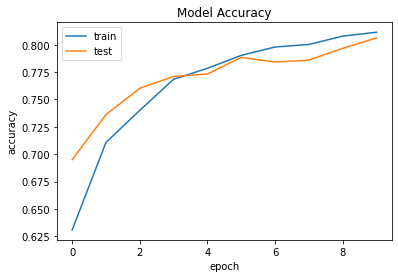

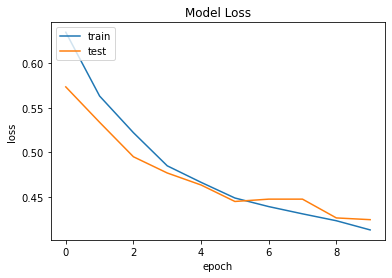

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [6]:
from keras.preprocessing import image
from os.path import isfile, join

predict_dir_path=base_dir + 'predict/'
files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]

for file in files:    
    predict = image.load_img(predict_dir_path + file, target_size = (150, 150))   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = model.predict(predict_modified)
    if result[0][0] >= 0.5:
        print("Prediction = dog ")
        print ("Probability = " + str(result[0][0]))
    else:
        print("Prediction = cat")
        print ("Probability = " + str(1 - result[0][0]))

Prediction = dog 
Probability = 0.994395
Prediction = cat
Probability = 0.9983606040477753
Prediction = cat
Probability = 0.5734294652938843
Prediction = cat
Probability = 0.7950560748577118
Prediction = dog 
Probability = 0.9989258
